# Step 1 & 2: Data Loading, Cleaning, and Sentiment Extraction

In [230]:
# 📦 Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# 📥 Load Dataset
df = pd.read_csv(r"D:\DS PROJECT 2\DATASET\amazon2.tsv", sep='\t')

# 📝 Basic Info
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
df.head()

Shape of dataset: (3150, 5)

Data Types:
 rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

Missing values:
 rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [231]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


##  Text Cleaning Function

In [233]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string  # Import the string module
import nltk  # Import nltk

# Download punkt resource (if not already downloaded)
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

# Assuming your data is in a DataFrame called 'df'

# 1. Inspect the Data
print("Dataframe head:")
print(df.head())  # Check the first few rows
print("\nDataframe info:")
print(df.info())  # Check data types and non-null values.  Important!

# 2. Handle NaN values in 'verified_reviews'
print("\nNumber of NaN values in 'verified_reviews' before handling:")
print(df['verified_reviews'].isnull().sum()) # Print the number of null values in verified_reviews

df['verified_reviews'] = df['verified_reviews'].fillna(
    ''
)  # Replace NaN with an empty string.  A common and safe approach.
# or
# df.dropna(subset=['verified_reviews'], inplace=True) # Remove rows with NaN in 'verified_reviews' - use this cautiously if other columns are important

print("\nNumber of NaN values in 'verified_reviews' after handling:")
print(df['verified_reviews'].isnull().sum()) # Print the number of null values in verified_reviews

# 3. Text cleaning function
def clean_text(text):
    text=text.lower()
    text=re.sub(r'[^a-zA-Z\s]','',text)
    text=re.sub(f'[{string.punctuation}]','',text) # Use string.punctuation
    tokens=word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_reviews'] = df['verified_reviews'].apply(clean_text)

# 4.  Vectorize the text
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df['cleaned_reviews'])  # Use the cleaned text

# 5.  (Optional) Convert to DataFrame for inspection
words_df = pd.DataFrame(
    words.toarray(), columns=cv.get_feature_names_out()
)  #  Create dataframe

print("\nShape of the vectorized data:")
print(words_df.shape) # Print the shape

print("\nFirst few rows of the vectorized data:")
print(words_df.head())  # Display the first few rows of the vectorized data


Dataframe head:
   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-nu

In [234]:
df['cleaned_reviews'].head

<bound method NDFrame.head of 0                                               love echo
1                                                    love
2       sometim play game answer question correctli al...
3       lot fun thing yr old learn dinosaur control li...
4                                                   music
                              ...                        
3145                            perfect kid adult everyon
3146    listen music search locat check time look weat...
3147    love thing run entir home tv light thermostat ...
3148    complaint sound qualiti isnt great mostli use ...
3149                                                 good
Name: cleaned_reviews, Length: 3150, dtype: object>

##  Sentiment Analysis using TextBlob


In [236]:
# ✅ Sentiment Polarity (TextBlob)
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_polarity'] = df['cleaned_reviews'].apply(get_sentiment_polarity)
# ✅ Assign sentiment label
def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_polarity'].apply(label_sentiment)

## Exploratory Data Analysis (EDA)

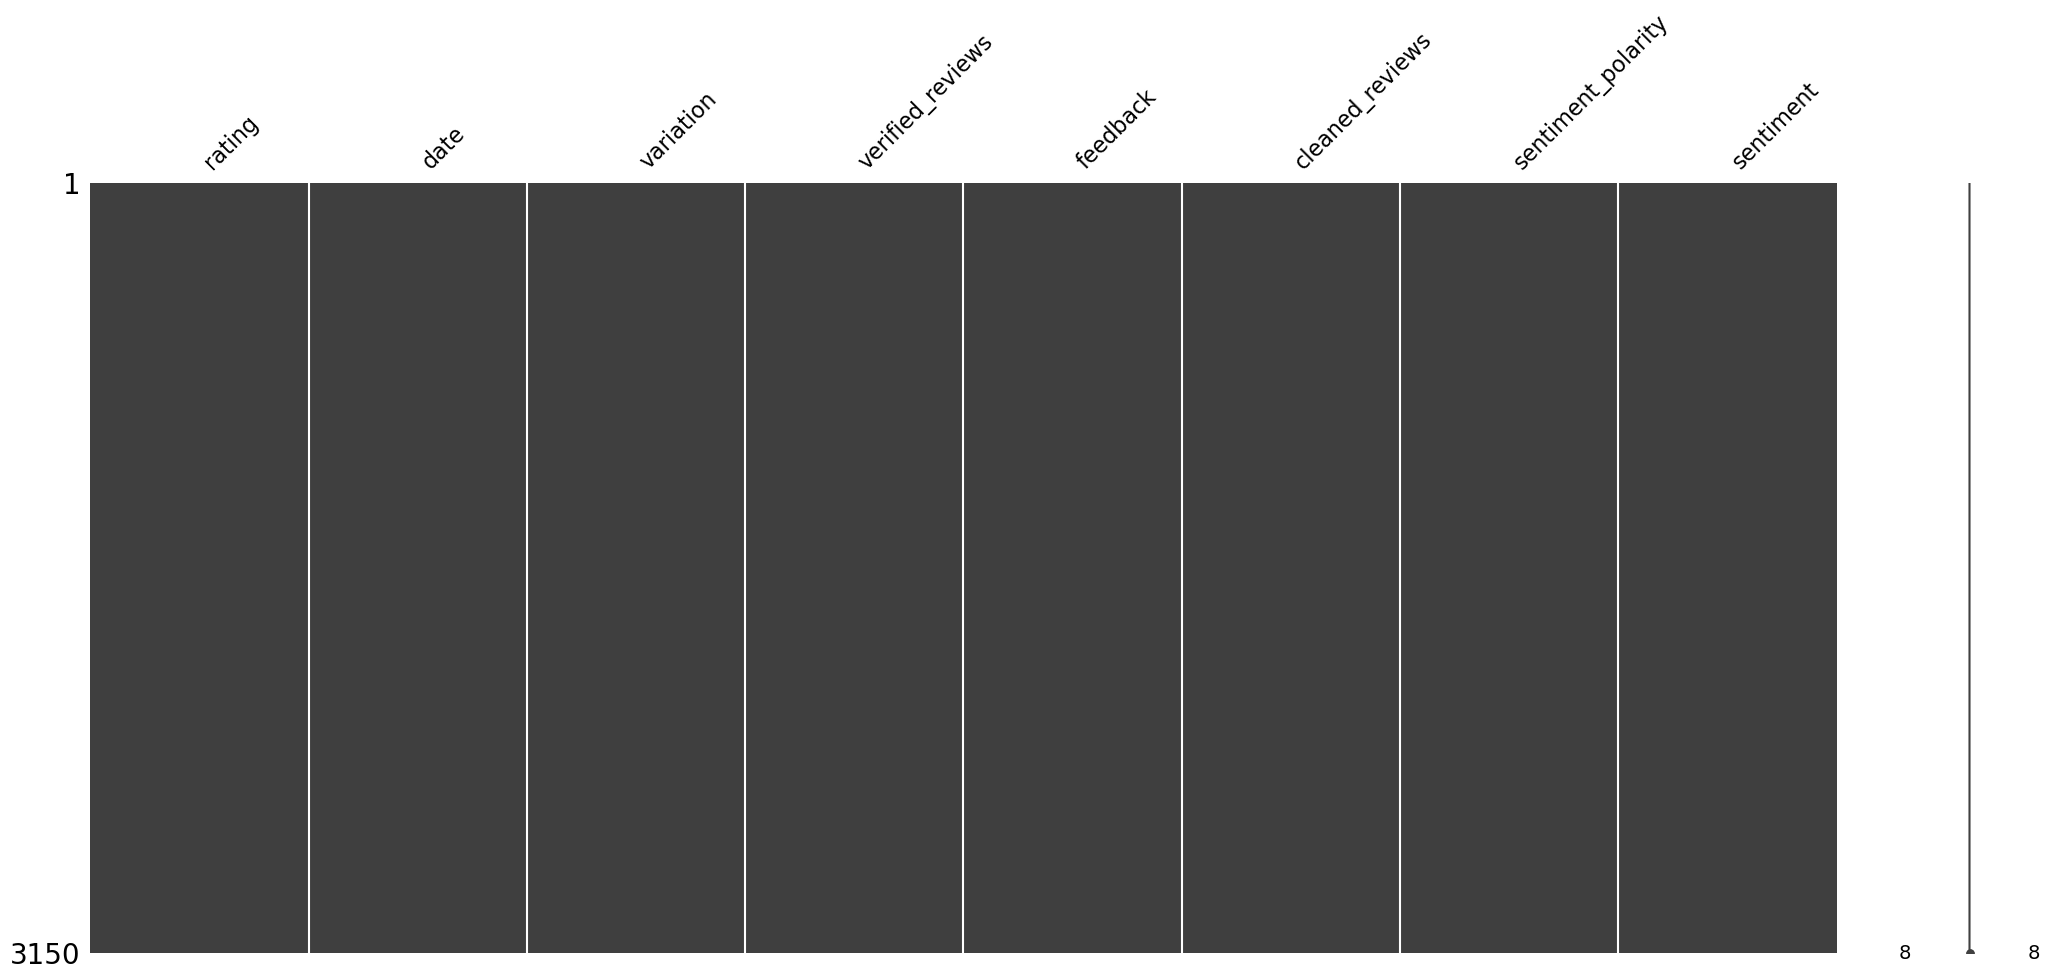

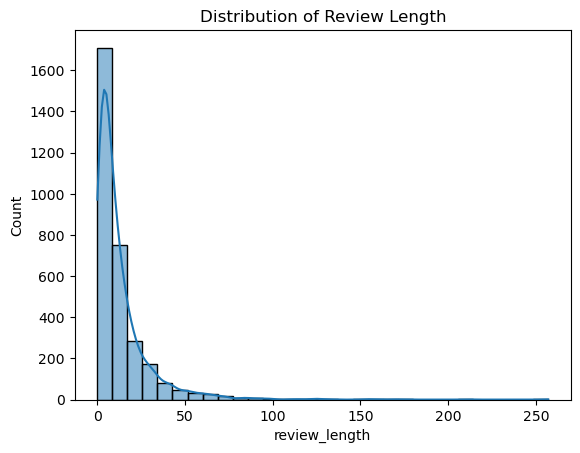

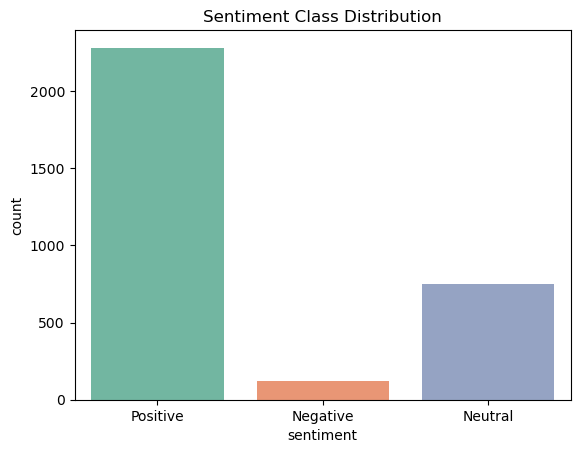

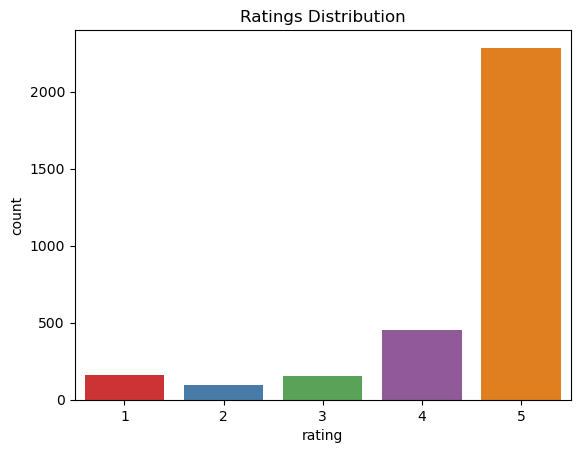

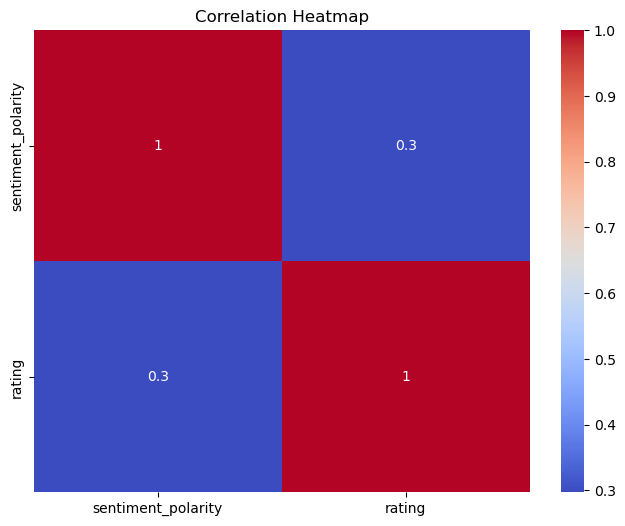

In [238]:
# 📌 Missing Data Visualization
msno.matrix(df)
plt.show()

# 📌 Review Length Distribution
df['review_length'] = df['cleaned_reviews'].apply(lambda x: len(x.split()))
sns.histplot(df['review_length'], bins=30, kde=True)
plt.title("Distribution of Review Length")
plt.show()

# 📌 Sentiment Distribution
sns.countplot(x='sentiment', data=df, palette='Set2')
plt.title("Sentiment Class Distribution")
plt.show()

# 📌 Rating Distribution
sns.countplot(x='rating', data=df, palette='Set1')
plt.title("Ratings Distribution")
plt.show()

# 📌 Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['sentiment_polarity', 'rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Step 3: Outlier Detection, Encoding, and PCA

In [240]:
from sklearn.ensemble import IsolationForest

# Select numeric features
features_for_outliers = df[['sentiment_polarity', 'rating', 'review_length']]

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.02, random_state=42)
outliers = iso_forest.fit_predict(features_for_outliers)

# Add outlier flag
df['outlier'] = outliers
df = df[df['outlier'] == 1]  # Keep only non-outliers
df.drop(columns=['outlier'], inplace=True)

print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (3087, 9)


### 3.2 Encoding Categorical Variables

In [242]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary 'feedback'
le_feedback = LabelEncoder()
df['feedback_encoded'] = le_feedback.fit_transform(df['feedback'])  # Yes=1, No=0

# Label Encoding for sentiment (optional target)
le_sentiment = LabelEncoder()
df['sentiment_encoded'] = le_sentiment.fit_transform(df['sentiment'])  # Pos/Neg/Neutral

# One-hot encoding for sentiment (optional if required)
df = pd.get_dummies(df, columns=['sentiment'], drop_first=True)

## 3.3 PCA (Principal Component Analysis)

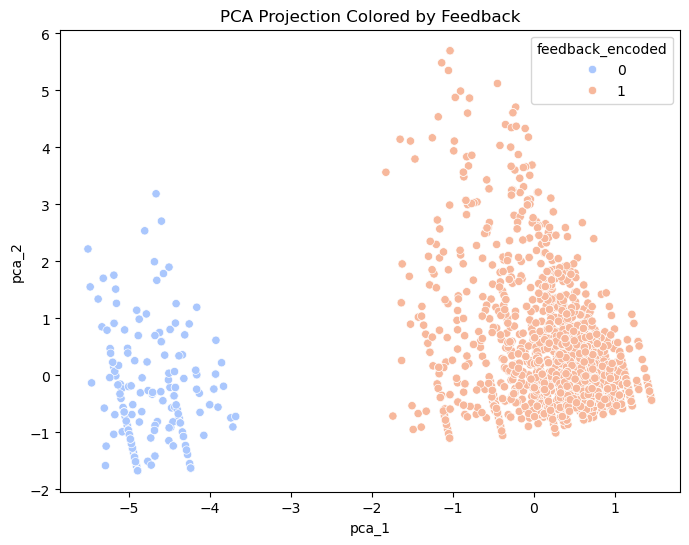

In [244]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select features
X = df[['sentiment_polarity', 'rating', 'review_length', 'feedback_encoded']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA columns
df['pca_1'] = X_pca[:, 0]
df['pca_2'] = X_pca[:, 1]

# Visualize PCA results
plt.figure(figsize=(8,6))
sns.scatterplot(x='pca_1', y='pca_2', hue='feedback_encoded', data=df, palette='coolwarm')
plt.title("PCA Projection Colored by Feedback")
plt.show()

In [245]:
len(df)

3087

In [246]:
df.shape

(3087, 14)

In [247]:
df.dtypes

rating                  int64
date                   object
variation              object
verified_reviews       object
feedback                int64
cleaned_reviews        object
sentiment_polarity    float64
review_length           int64
feedback_encoded        int64
sentiment_encoded       int32
sentiment_Neutral        bool
sentiment_Positive       bool
pca_1                 float64
pca_2                 float64
dtype: object

In [248]:
df.nunique()

rating                   5
date                    77
variation               16
verified_reviews      2244
feedback                 2
cleaned_reviews       2110
sentiment_polarity     476
review_length           76
feedback_encoded         2
sentiment_encoded        3
sentiment_Neutral        2
sentiment_Positive       2
pca_1                 1259
pca_2                 1245
dtype: int64

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3087 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating              3087 non-null   int64  
 1   date                3087 non-null   object 
 2   variation           3087 non-null   object 
 3   verified_reviews    3087 non-null   object 
 4   feedback            3087 non-null   int64  
 5   cleaned_reviews     3087 non-null   object 
 6   sentiment_polarity  3087 non-null   float64
 7   review_length       3087 non-null   int64  
 8   feedback_encoded    3087 non-null   int64  
 9   sentiment_encoded   3087 non-null   int32  
 10  sentiment_Neutral   3087 non-null   bool   
 11  sentiment_Positive  3087 non-null   bool   
 12  pca_1               3087 non-null   float64
 13  pca_2               3087 non-null   float64
dtypes: bool(2), float64(3), int32(1), int64(4), object(4)
memory usage: 307.5+ KB


In [250]:
df.isna() 

,rating,date,variation,verified_reviews,feedback,cleaned_reviews,sentiment_polarity,review_length,feedback_encoded,sentiment_encoded,sentiment_Neutral,sentiment_Positive,pca_1,pca_2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3146,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3147,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3148,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Analyzing 'rating' column
##### This column refers to the rating of the variation given by the user

In [252]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
rating
5    2274
4     448
3     148
1     136
2      81
Name: count, dtype: int64


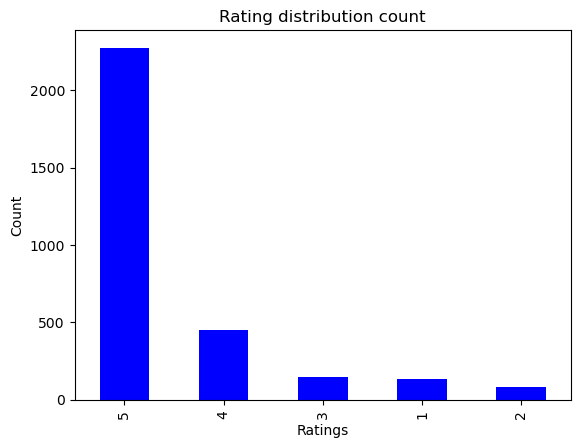

In [253]:
#Bar plot to visualize the total counts of each rating

df['rating'].value_counts().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [254]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution after Data_clean: \n{round(df['rating'].value_counts()/df.shape[0]*100,2)}")

Rating value count - percentage distribution after Data_clean: 
rating
5    73.66
4    14.51
3     4.79
1     4.41
2     2.62
Name: count, dtype: float64


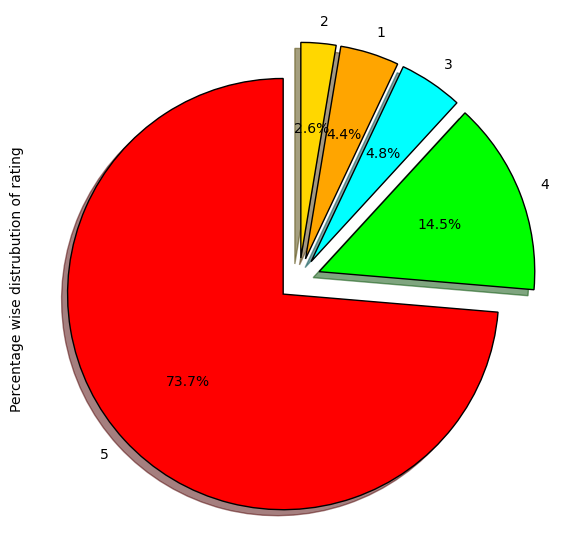

In [255]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'lime', 'aqua','orange','gold')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['rating'].value_counts()/df.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

# Analyzing 'feedback' column
#### This column refers to the feedback of the verified review

In [257]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2870
0     217
Name: count, dtype: int64


In [258]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = df[df['feedback'] == 0].iloc[1]['cleaned_reviews']
print(review_0)

sound terribl u want good music get bose


In [259]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = df[df['feedback'] == 1].iloc[1]['cleaned_reviews']
print(review_1)

love


From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

Let's plot the feedback value count in a bar graph

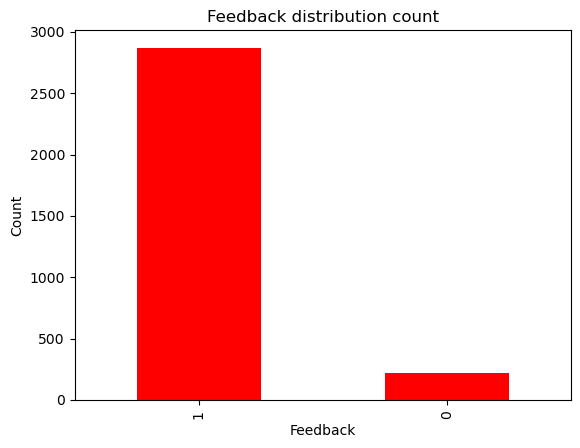

In [261]:
#Bar graph to visualize the total counts of each feedback

df['feedback'].value_counts().plot.bar(color = 'red')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [262]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(df['feedback_encoded'].value_counts()/df.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback_encoded
1    92.97
0     7.03
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

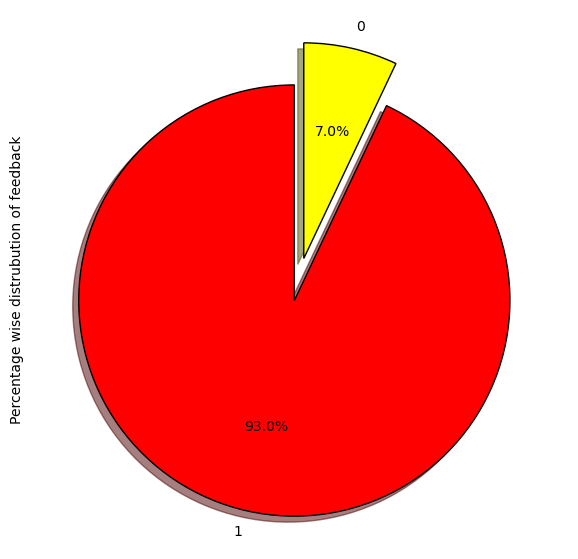

In [263]:

fig = plt.figure(figsize=(7,7))

colors = ('red', 'yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = df['feedback_encoded'].value_counts()/df.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

Feedback distribution

93.0% reviews are positive,
7.0% reviews are negative

The 'rating' values for different values of 'feedback':

In [266]:
#Feedback = 0
df[df['feedback_encoded'] == 0]['rating'].value_counts()

rating
1    136
2     81
Name: count, dtype: int64

In [267]:
#Feedback = 1
df[df['feedback_encoded'] == 1]['rating'].value_counts()

rating
5    2274
4     448
3     148
Name: count, dtype: int64

If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

# Analyzing 'variation' column
This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.


In [270]:
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{df['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      512
Charcoal Fabric                 424
Configuration: Fire TV Stick    348
Black  Show                     258
Black                           257
Black  Plus                     257
Black  Spot                     231
White  Dot                      184
Heather Gray Fabric             155
White  Spot                     104
Sandstone Fabric                 90
White                            89
White  Show                      81
White  Plus                      74
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


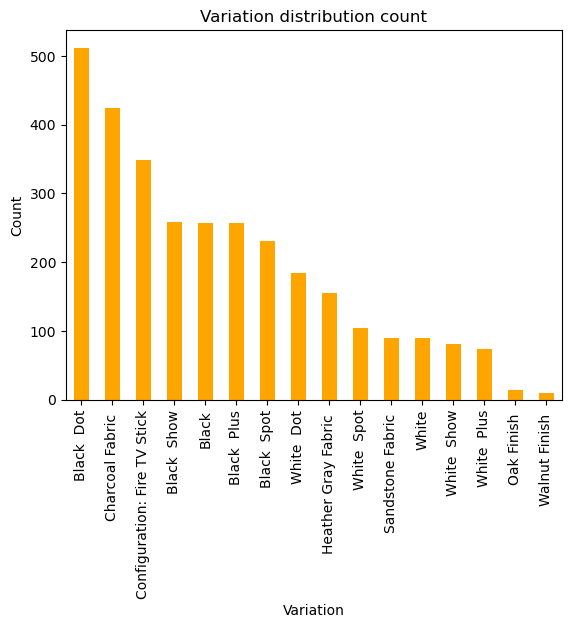

In [271]:
#Bar graph to visualize the total counts of each variation

df['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [272]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(df['variation'].value_counts()/df.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.59
Charcoal Fabric                 13.74
Configuration: Fire TV Stick    11.27
Black  Show                      8.36
Black                            8.33
Black  Plus                      8.33
Black  Spot                      7.48
White  Dot                       5.96
Heather Gray Fabric              5.02
White  Spot                      3.37
Sandstone Fabric                 2.92
White                            2.88
White  Show                      2.62
White  Plus                      2.40
Oak Finish                       0.45
Walnut Finish                    0.29
Name: count, dtype: float64


In [273]:
# Mean rating according to variation
df.groupby('variation')['rating'].mean()

variation
Black                           4.276265
Black  Dot                      4.476562
Black  Plus                     4.455253
Black  Show                     4.546512
Black  Spot                     4.419913
Charcoal Fabric                 4.745283
Configuration: Fire TV Stick    4.597701
Heather Gray Fabric             4.729032
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.213483
White  Dot                      4.423913
White  Plus                     4.378378
White  Show                     4.358025
White  Spot                     4.413462
Name: rating, dtype: float64

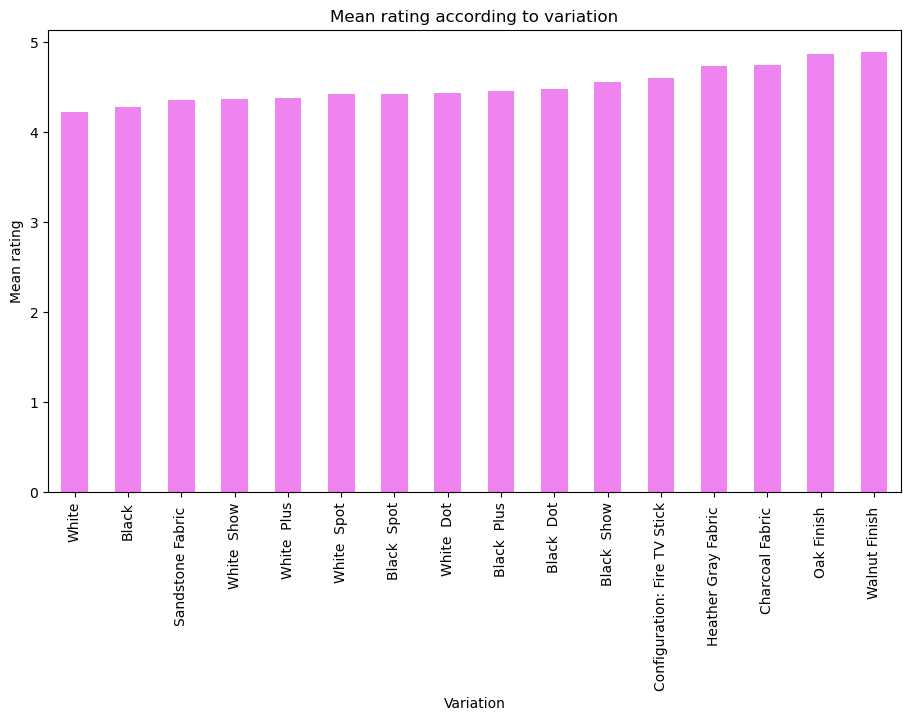

In [274]:
df.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'violet', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [275]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Assuming your data is in a DataFrame called 'df'

# 1. Inspect the Data
print("Dataframe head:")
print(df.head())  # Check the first few rows
print("\nDataframe info:")
print(df.info())  # Check data types and non-null values.  Important!

# 2. Handle NaN values in 'verified_reviews'
print("\nNumber of NaN values in 'verified_reviews' before handling:")
print(df['verified_reviews'].isnull().sum()) # Print the number of null values in verified_reviews

df['verified_reviews'] = df['verified_reviews'].fillna(
    ''
)  # Replace NaN with an empty string.  A common and safe approach.
# or
# df.dropna(subset=['verified_reviews'], inplace=True) # Remove rows with NaN in 'verified_reviews' - use this cautiously if other columns are important

print("\nNumber of NaN values in 'verified_reviews' after handling:")
print(df['verified_reviews'].isnull().sum()) # Print the number of null values in verified_reviews

# 3.  Vectorize the text
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df['verified_reviews'])  # Access the column correctly

# 4.  (Optional) Convert to DataFrame for inspection
words_df = pd.DataFrame(
    words.toarray(), columns=cv.get_feature_names_out()
)  #  Create dataframe

print("\nShape of the vectorized data:")
print(words_df.shape) # Print the shape

print("\nFirst few rows of the vectorized data:")
print(words_df.head())  # Display the first few rows of the vectorized data


Dataframe head:
   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  \
0                                      Love my Echo!         1   
1                                          Loved it!         1   
2  Sometimes while playing a game, you can answer...         1   
3  I have had a lot of fun with this thing. My 4 ...         1   
4                                              Music         1   

                                     cleaned_reviews  sentiment_polarity  \
0                                          love echo            0.500000   
1                                               love            0.500000   
2  sometim play game answer question correctli al...           -0.166667   
3  lot fun thing yr old learn 

In [276]:
from sklearn.feature_extraction.text import CountVectorizer # Import the CountVectorizer class from the necessary module

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)

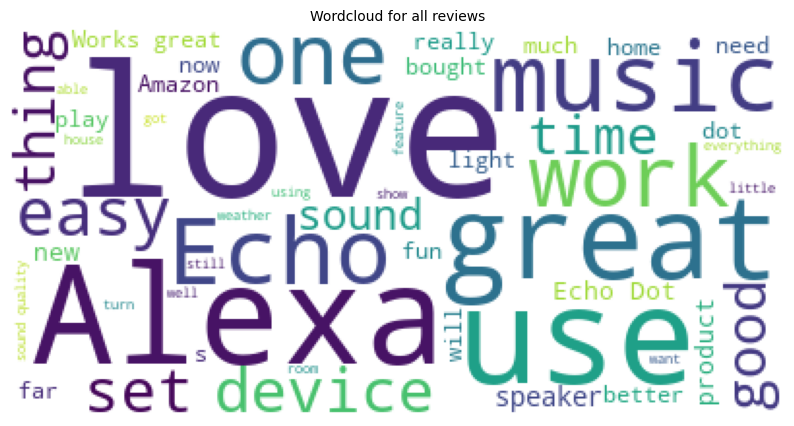

In [277]:
from wordcloud import WordCloud # Import the WordCloud class

# Combine all reviews
reviews = " ".join([review for review in df['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [278]:

# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in df[df['feedback_encoded'] == 0]['cleaned_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['feedback_encoded'] == 1]['cleaned_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

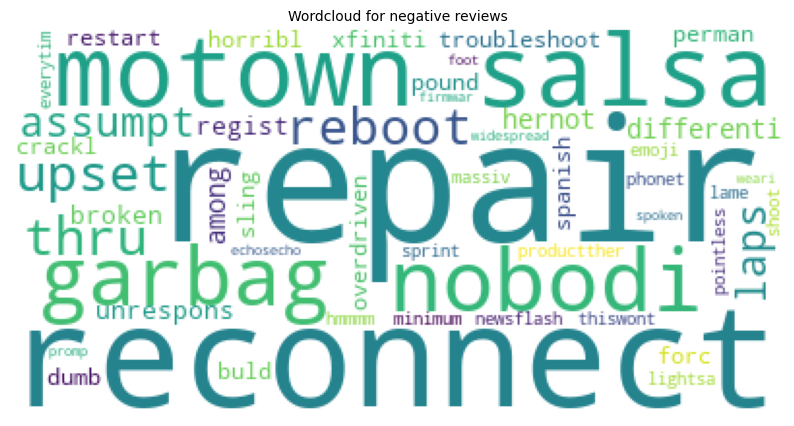

In [279]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

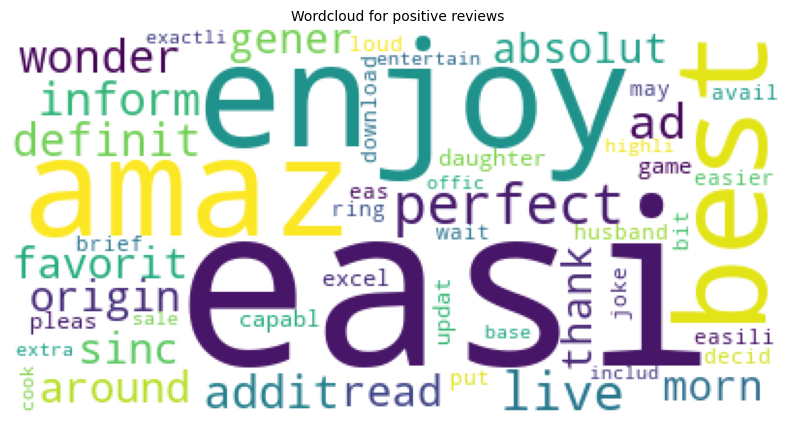

In [280]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

In [290]:
df.to_csv('cleaned_reviews11.tsv', sep='\t', index=False)

## Step 4:Model Building and Evaluation

### Naive Bayes

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(df['cleaned_reviews'])

# Target variable 
y = df['feedback']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)


## Model Evaluation for Naive Bayes

Naive Bayes Model Evaluation:
Accuracy: 0.9223
F1 Score: 0.8881
Recall: 0.9223
AUC-ROC: 0.9023


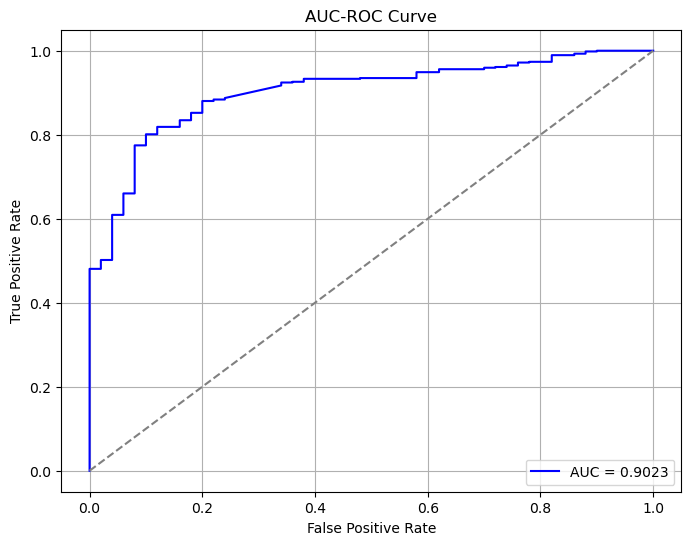

In [295]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score

# Evaluate the model
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation metrics
print("Naive Bayes Model Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot AUC-ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Hyperparameter Tuning Using GridSearchCV for Naive Bayes

In [297]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

nb_params = {'alpha': [0.1, 0.5, 1.0]}
nb = MultinomialNB()
nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='accuracy')
nb_grid.fit(X_train, y_train)

print("Best Params NB:", nb_grid.best_params_)
print("Best Score NB:", nb_grid.best_score_)


Best Params NB: {'alpha': 0.1}
Best Score NB: 0.938030401327081


## Hyperparameter Tuning Using GridSearchCV for Naive Bayes

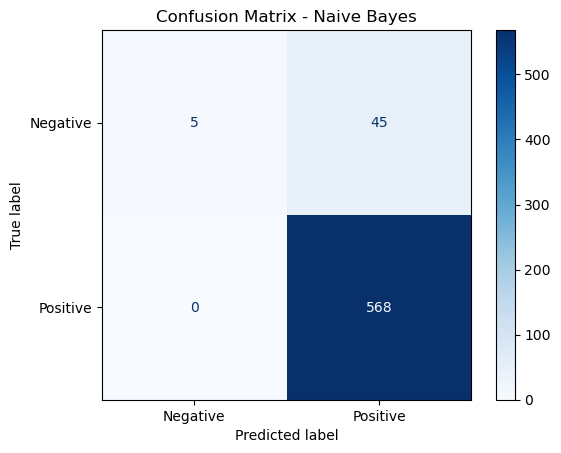

In [299]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

# Fit the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_tfidf, y)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Compute confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

## Model Building for Support Vector Machine (SVM) Model

In [301]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Create SVM model with probability=True
svm_model = SVC(probability=True, kernel='linear')  # or 'rbf', etc. as needed
svm_model.fit(X_train, y_train)



SVC(kernel='linear', probability=True)

## Model Evaluation for Support Vector Machine (SVM) Model

SVM Model Evaluation:
Accuracy: 0.9304
F1 Score: 0.9054
Recall: 0.9304
AUC-ROC: 0.9364


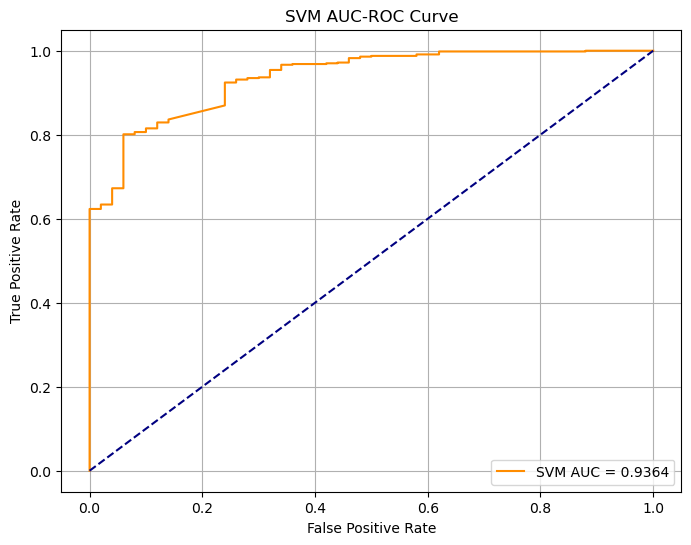

In [303]:
# Evaluate the SVM model
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)

# Print evaluation metrics
print("SVM Model Evaluation:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"AUC-ROC: {roc_auc_svm:.4f}")

# Plot AUC-ROC Curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', label=f"SVM AUC = {roc_auc_svm:.4f}")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM AUC-ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Hyperparameter Tuning Using GridSearchCV for Support Vector Machine (SVM) Model

In [305]:
from sklearn.svm import SVC

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm = SVC(probability=True)
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("Best Params SVM:", svm_grid.best_params_)
print("Best Score SVM:", svm_grid.best_score_)


Best Params SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score SVM: 0.9477511065853118


## Confusion Matrix for Support Vector Machine (SVM) Model

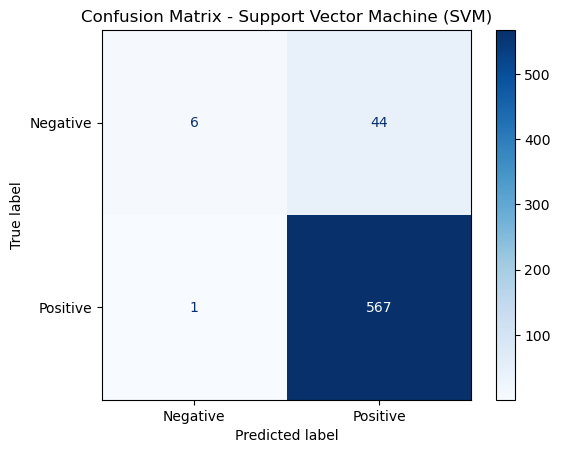

In [307]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit the SVM model
svm_model = SVC(kernel='linear')  # You can also use other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

# Compute confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrix
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Negative', 'Positive'])
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - Support Vector Machine (SVM)")
plt.show()

## Model Building for Random Forest Model

In [309]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

## Model Evaluation for Random Forest Model

Random Forest Model Evaluation:
Accuracy: 0.9401
F1 Score: 0.9235
Recall: 0.9401
AUC-ROC: 0.9215


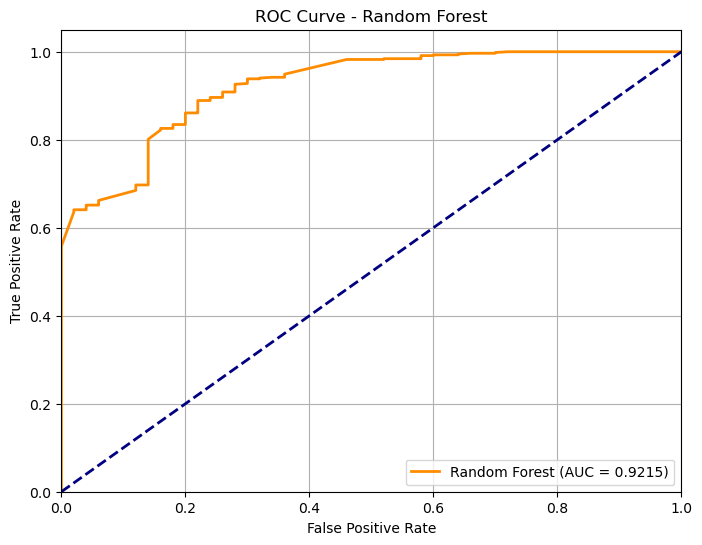

In [311]:
# Evaluate the Random Forest model
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Print evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"AUC-ROC: {roc_auc_rf:.4f}")

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



## Hyperparameter Tuning Using GridSearchCV for Random Forest Model

In [313]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best Params RF:", rf_grid.best_params_)
print("Best Score RF:", rf_grid.best_score_)


Best Params RF: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Score RF: 0.9473454270721271


## Confusion Matrix for Random Forest Model

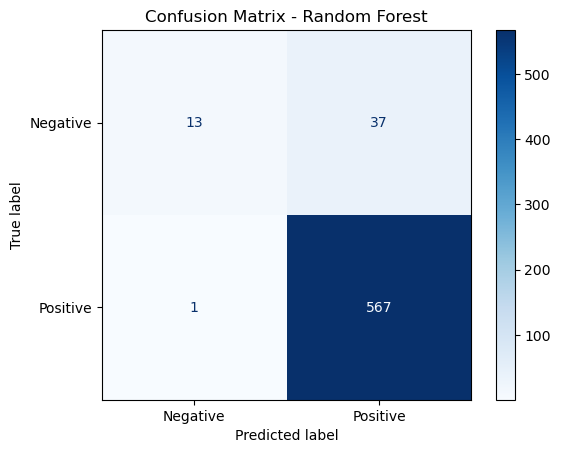

In [315]:
from sklearn.ensemble import RandomForestClassifier

# Fit the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()


## KNN Model: Building, Evaluation, and Confusion Matrix

KNN Model Evaluation:
Accuracy: 0.9159
F1 Score: 0.9556
Recall: 0.9859
AUC-ROC: 0.7365


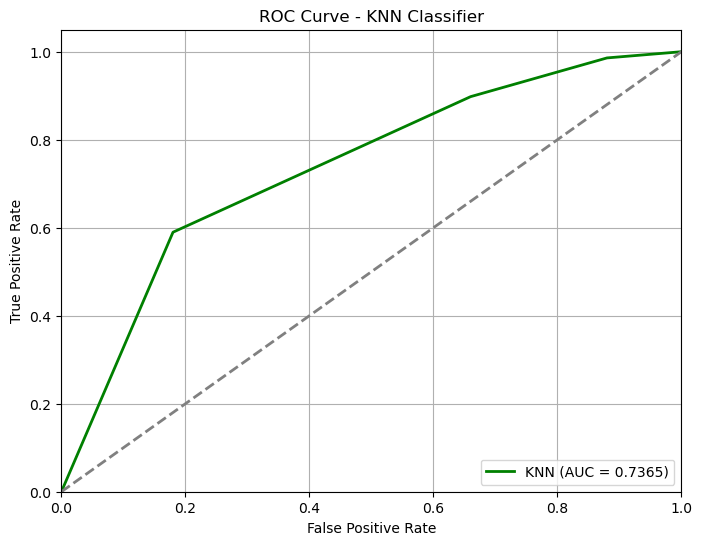

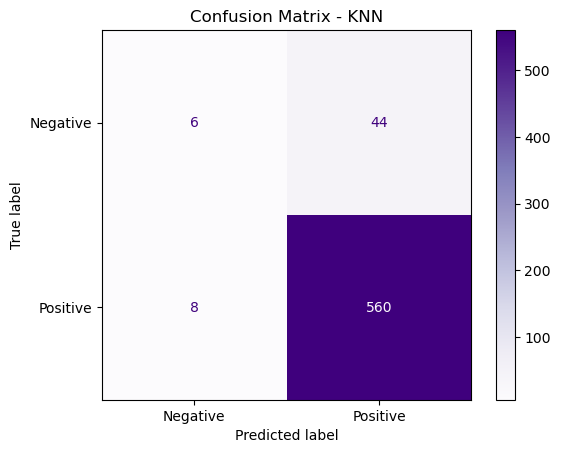

In [317]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Build and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 2: Make predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]  # Needed for ROC-AUC

# Step 3: Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print("KNN Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"AUC-ROC: {auc_knn:.4f}")

# Compute ROC curve and AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting the AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Step 4: Display the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - KNN")
plt.show()


## Hyperparameter Tuning Using GridSearchCV for KNN Model

In [319]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

print("Best Params KNN:", knn_grid.best_params_)
print("Best Score KNN:", knn_grid.best_score_)


Best Params KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best Score KNN: 0.9384360808402656


## Model Building for XGBoost Model

In [321]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)


## Model Evaluation for XGBoost Model

XGBoost Model Evaluation:
Accuracy: 0.9434
F1 Score: 0.9314
Recall: 0.9434
AUC-ROC: 0.9123


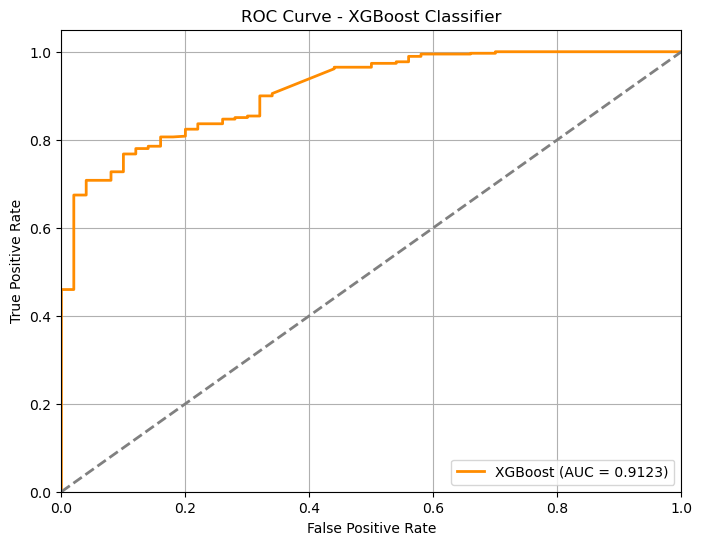

In [323]:
# Evaluate the XGBoost model
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

# Print evaluation metrics
print("XGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"AUC-ROC: {roc_auc_xgb:.4f}")

# Compute ROC curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting the AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal for random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Hyperparameter Tuning Using GridSearchCV for XGBoost Model

In [325]:
from xgboost import XGBClassifier

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

print("Best Params XGB:", xgb_grid.best_params_)
print("Best Score XGB:", xgb_grid.best_score_)


Best Params XGB: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Score XGB: 0.9441082031025448


## Confusion Matrix for XGBoost Model

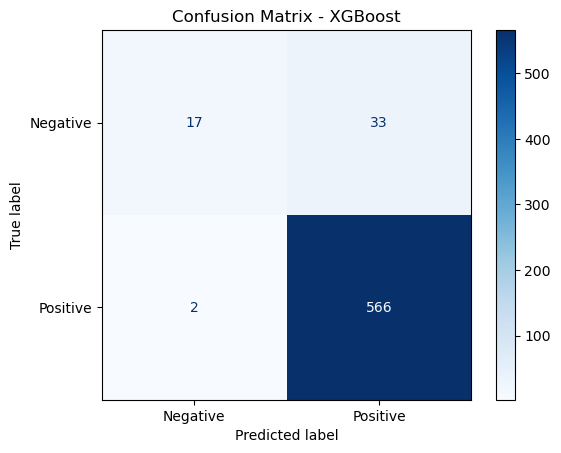

In [327]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.show()


## Model Building for Decision Tree Model

In [329]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)


## Model Evaluation for Decision Tree Model

Decision Tree Model Evaluation:
Accuracy: 0.9385
F1 Score: 0.9322
Recall: 0.9385
AUC-ROC: 0.7550


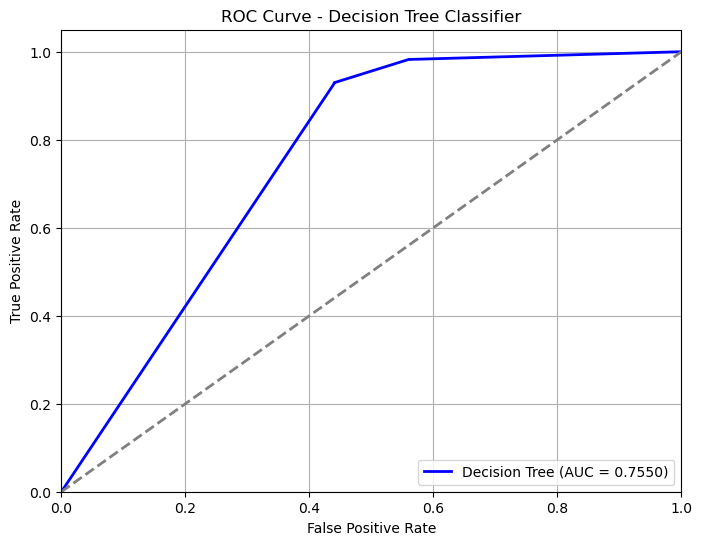

In [331]:
# Evaluate the Decision Tree model
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
roc_auc_dt = roc_auc_score(y_test, y_pred_prob_dt)

# Print evaluation metrics
print("Decision Tree Model Evaluation:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"AUC-ROC: {roc_auc_dt:.4f}")

# Compute ROC curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plotting the AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Hyperparameter Tuning Using GridSearchCV for Decision Tree Model

In [333]:
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

print("Best Params DT:", dt_grid.best_params_)
print("Best Score DT:", dt_grid.best_score_)


Best Params DT: {'max_depth': 10, 'min_samples_split': 5}
Best Score DT: 0.936413431769469


## Confusion Matrix for Decision Tree Model

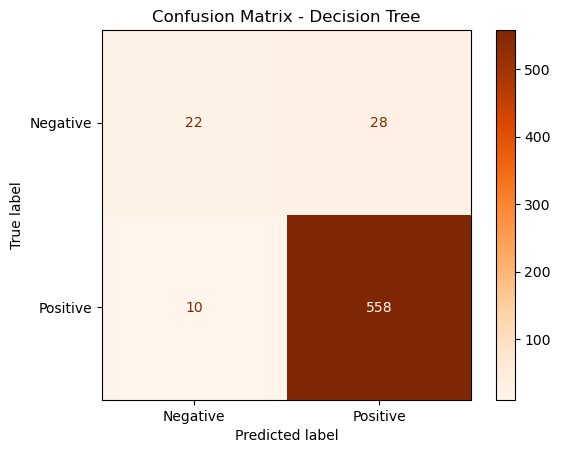

In [335]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Compute confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Oranges')
plt.title("Confusion Matrix - Decision Tree")
plt.show()


## Model Building for Logistic Regression Model

In [337]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)


## Model Evaluation for Logistic Regression Model

Logistic Regression Model Evaluation:
Accuracy: 0.9191
F1 Score: 0.8803
Recall: 0.9191
AUC-ROC: 0.9376


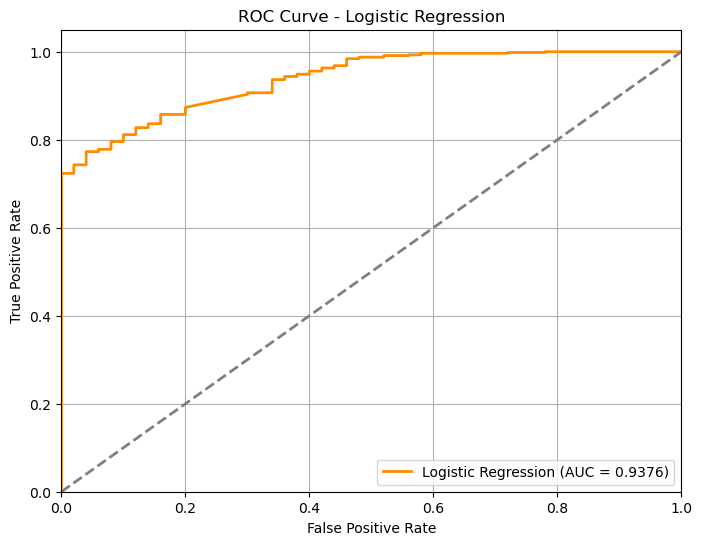

In [339]:
# Evaluate the Logistic Regression model
y_pred_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC

accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
roc_auc_lr = roc_auc_score(y_test, y_pred_prob_lr)

# Print evaluation metrics
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"AUC-ROC: {roc_auc_lr:.4f}")

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Plotting the AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Hyperparameter Tuning Using GridSearchCV for Logistic Regression Model

In [341]:
from sklearn.linear_model import LogisticRegression

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}
lr = LogisticRegression()
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

print("Best Params LR:", lr_grid.best_params_)
print("Best Score LR:", lr_grid.best_score_)


Best Params LR: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score LR: 0.9493721822108713


## Confusion Matrix for Logistic Regression Model

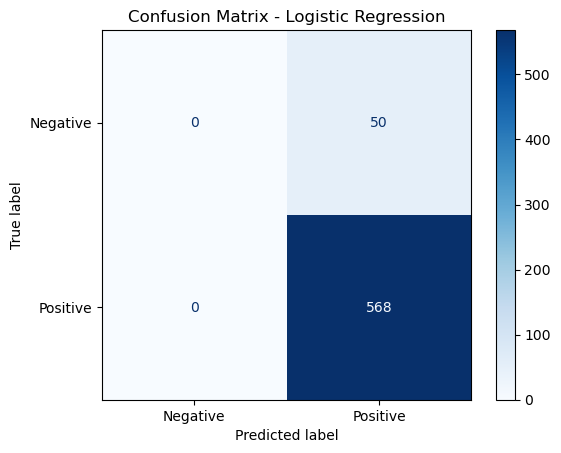

In [343]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Fit the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # max_iter to ensure convergence
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## Model Comparision

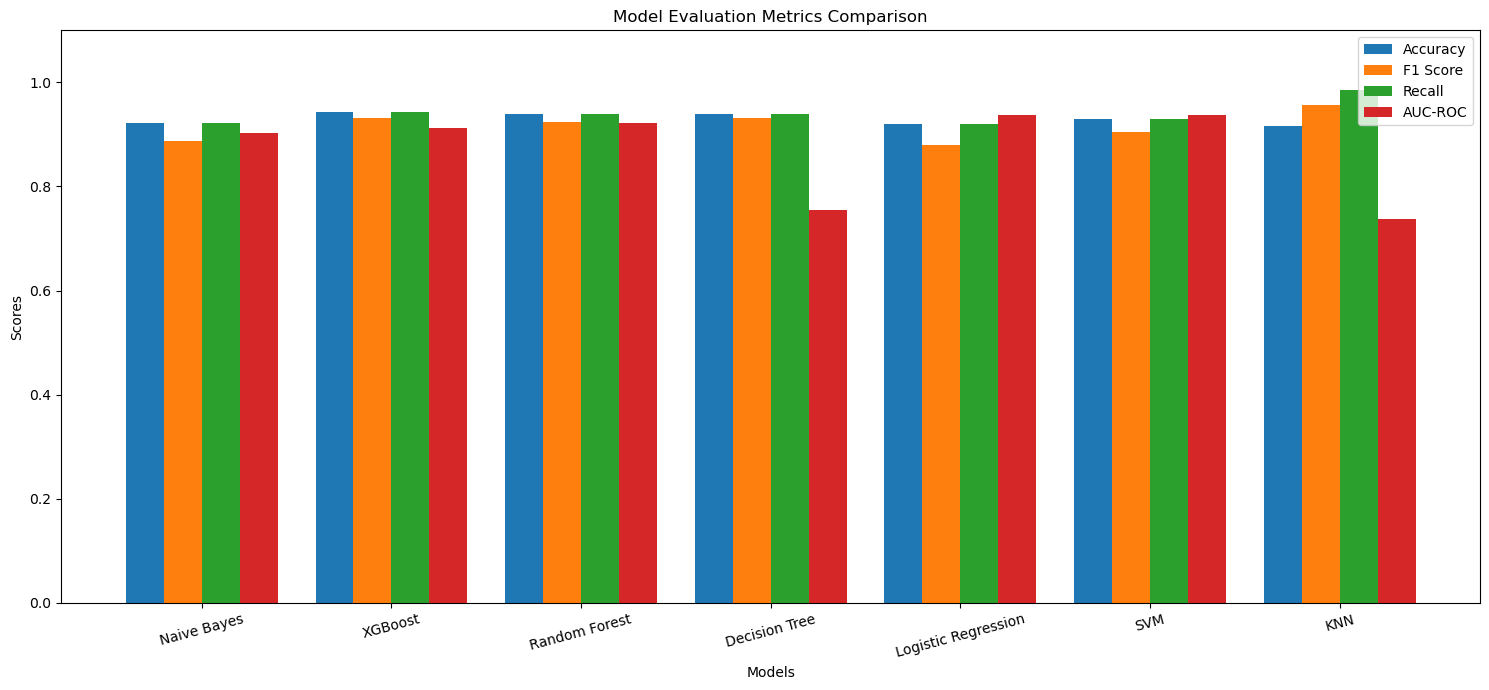

In [345]:
import matplotlib.pyplot as plt
import numpy as np

# Model names including KNN
models = ['Naive Bayes', 'XGBoost', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN']

# Replace these variables with your actual evaluation results for KNN
accuracy_scores = [accuracy, accuracy_xgb, accuracy_rf, accuracy_dt, accuracy_lr, accuracy_svm, accuracy_knn]
f1_scores = [f1, f1_xgb, f1_rf, f1_dt, f1_lr, f1_svm, f1_knn]
recall_scores = [recall, recall_xgb, recall_rf, recall_dt, recall_lr, recall_svm, recall_knn]
roc_auc_scores = [roc_auc, roc_auc_xgb, roc_auc_rf, roc_auc_dt, roc_auc_lr, roc_auc_svm, auc_knn]

# Bar width and X locations
x = np.arange(len(models))
width = 0.2

# Plot grouped bar chart
plt.figure(figsize=(15, 7))
plt.bar(x - 1.5*width, accuracy_scores, width, label='Accuracy')
plt.bar(x - 0.5*width, f1_scores, width, label='F1 Score')
plt.bar(x + 0.5*width, recall_scores, width, label='Recall')
plt.bar(x + 1.5*width, roc_auc_scores, width, label='AUC-ROC')

# Labeling
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics Comparison')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()


## Sentiment Analysis using TextBlob

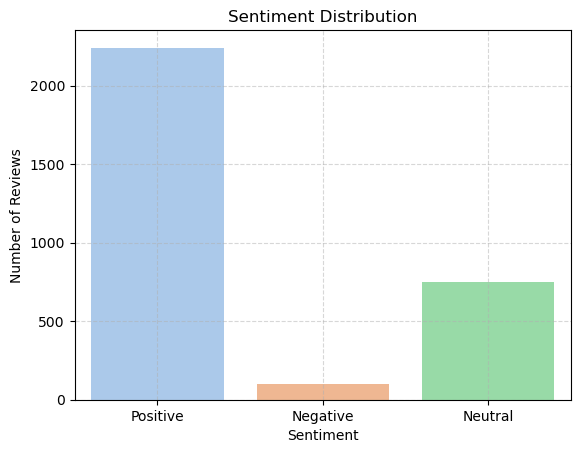

In [347]:
# ✅ Sentiment Polarity (TextBlob)
def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity

df['sentiment_polarity'] = df['cleaned_reviews'].apply(get_sentiment_polarity)

# ✅ Assign sentiment label
def label_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_polarity'].apply(label_sentiment)

import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


## Model Saving for Deployment

In [381]:
import pickle

# Save Naive Bayes
with open("naive_bayes_model.pkl", "wb") as f:
    pickle.dump(nb_model, f)

# Save SVM
with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm_model, f)

# Save XGBoost
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

# Save Logistic Regression
with open("logistic_regression_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)

# Save your TF-IDF Vectorizer
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)
